### Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
pd.pandas.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix,f1_score, roc_curve, precision_score, recall_score, precision_recall_curve, classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Loading Data

In [2]:
df= pd.read_csv("Train_Dataset-01.csv")
test= pd.read_csv('Test_Dataset-01.csv')

In [3]:
df.shape, df.columns

((377, 32),
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'))

#### We have data for 377 Patients with 31 columns. So, essentially we have 30 features and 1 target column which is diagnosis. Let us quickly look at the values for each column

In [4]:
df.iloc[1,:]

id                           842517
diagnosis                         M
radius_mean                   20.57
texture_mean                  17.77
perimeter_mean                132.9
area_mean                      1326
smoothness_mean             0.08474
compactness_mean            0.07864
concavity_mean               0.0869
concave points_mean         0.07017
symmetry_mean                0.1812
fractal_dimension_mean      0.05667
radius_se                    0.5435
texture_se                   0.7339
perimeter_se                  3.398
area_se                       74.08
smoothness_se              0.005225
compactness_se              0.01308
concavity_se                 0.0186
concave points_se            0.0134
symmetry_se                 0.01389
fractal_dimension_se       0.003532
radius_worst                  24.99
texture_worst                 23.41
perimeter_worst               158.8
area_worst                     1956
smoothness_worst             0.1238
compactness_worst           

### Target Exploration

Clearly, this is a binary classification problem

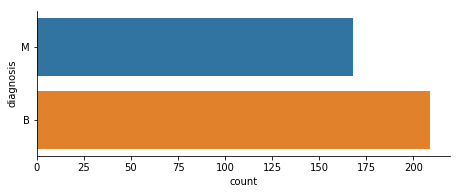

In [5]:
ax = sns.catplot(y="diagnosis", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

In [6]:
df['diagnosis'].value_counts(normalize = True)

B    0.554377
M    0.445623
Name: diagnosis, dtype: float64

In [7]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

id feature have no impact on target variable

In [76]:
df.drop(["id"], axis=1, inplace=True)
test.drop(["id"], axis=1, inplace=True)

KeyError: "['id'] not found in axis"

### Feature Exploration

In [9]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,377.0,0.445623,0.497695,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,377.0,14.396088,3.608645,6.981000,11.840000,13.560000,16.460000,28.11000
texture_mean,365.0,18.998849,4.149775,9.710000,15.910000,18.700000,21.580000,39.28000
perimeter_mean,377.0,93.836472,24.865873,43.790000,76.090000,87.460000,109.000000,188.50000
area_mean,377.0,680.749867,361.088294,143.500000,431.100000,566.200000,838.100000,2499.00000
smoothness_mean,376.0,0.097169,0.013750,0.062510,0.087557,0.096935,0.106300,0.14470
compactness_mean,371.0,0.107547,0.055567,0.019380,0.066495,0.095880,0.133900,0.34540
concavity_mean,377.0,0.095205,0.082866,0.000000,0.030000,0.070700,0.141700,0.42680
concave points_mean,377.0,0.052553,0.040148,0.000000,0.020690,0.038210,0.079530,0.20120
symmetry_mean,376.0,0.183372,0.028601,0.116700,0.163500,0.181250,0.196625,0.30400


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 31 columns):
diagnosis                  377 non-null int64
radius_mean                377 non-null float64
texture_mean               365 non-null float64
perimeter_mean             377 non-null float64
area_mean                  377 non-null float64
smoothness_mean            376 non-null float64
compactness_mean           371 non-null float64
concavity_mean             377 non-null float64
concave points_mean        377 non-null float64
symmetry_mean              376 non-null float64
fractal_dimension_mean     375 non-null float64
radius_se                  363 non-null float64
texture_se                 377 non-null float64
perimeter_se               377 non-null float64
area_se                    377 non-null float64
smoothness_se              374 non-null float64
compactness_se             375 non-null float64
concavity_se               376 non-null float64
concave points_se          376 no

In [12]:
df.isnull().sum()

diagnosis                   0
radius_mean                 0
texture_mean               12
perimeter_mean              0
area_mean                   0
smoothness_mean             1
compactness_mean            6
concavity_mean              0
concave points_mean         0
symmetry_mean               1
fractal_dimension_mean      2
radius_se                  14
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               3
compactness_se              2
concavity_se                1
concave points_se           1
symmetry_se                 1
fractal_dimension_se       13
radius_worst                0
texture_worst               0
perimeter_worst             1
area_worst                 13
smoothness_worst            3
compactness_worst           0
concavity_worst             6
concave points_worst        5
symmetry_worst              5
fractal_dimension_worst     3
dtype: int64

### Univariate Analysis

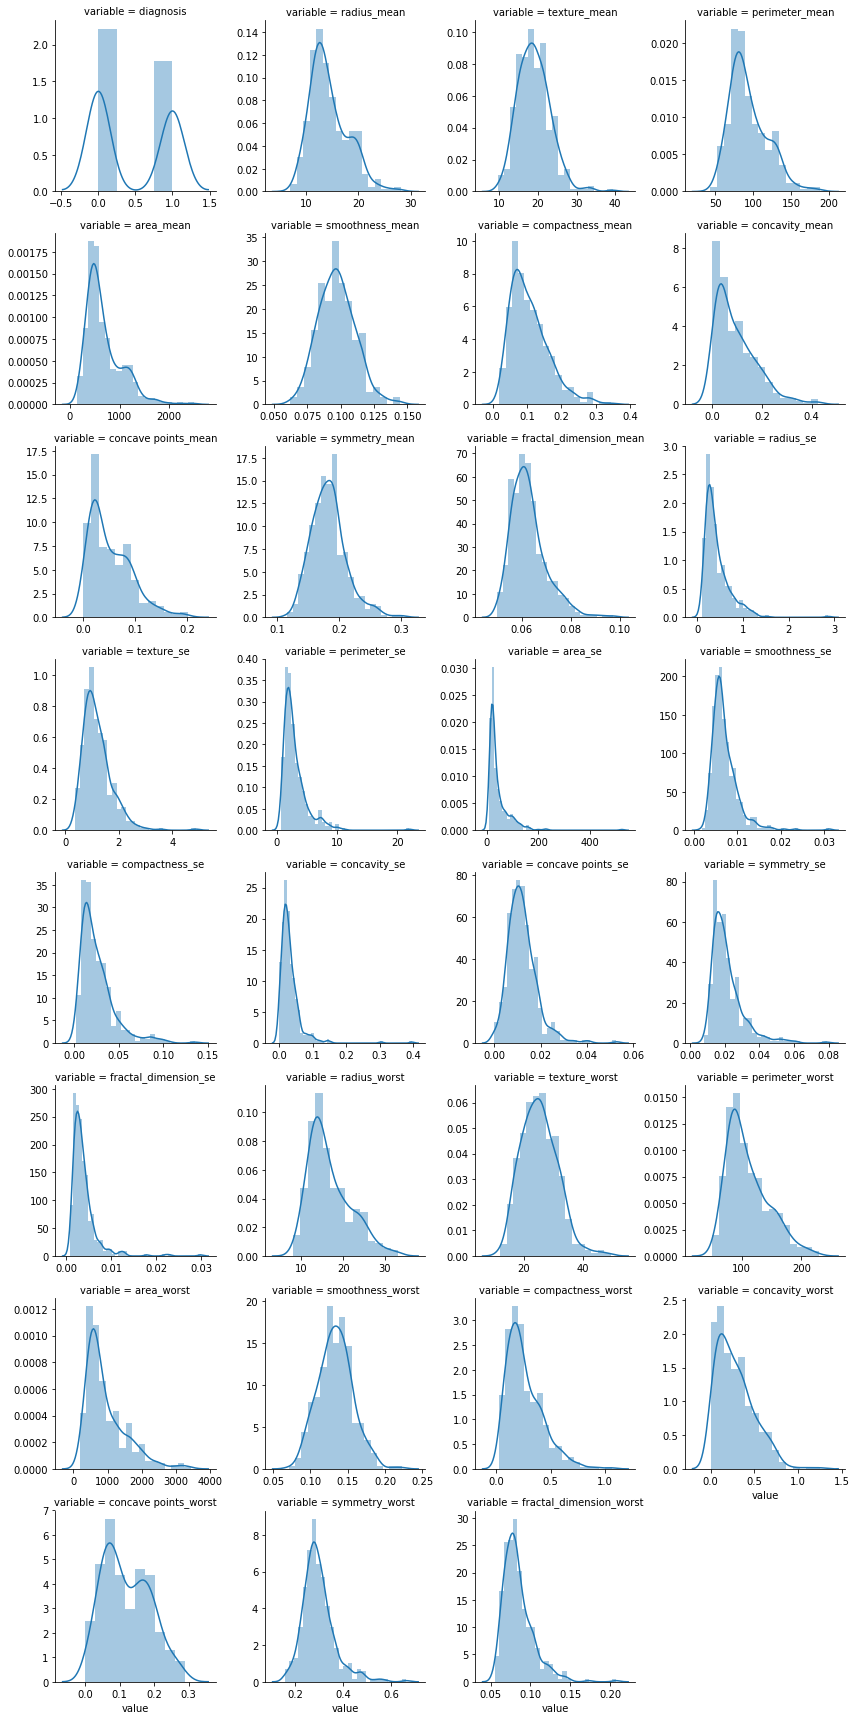

In [13]:
num= [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

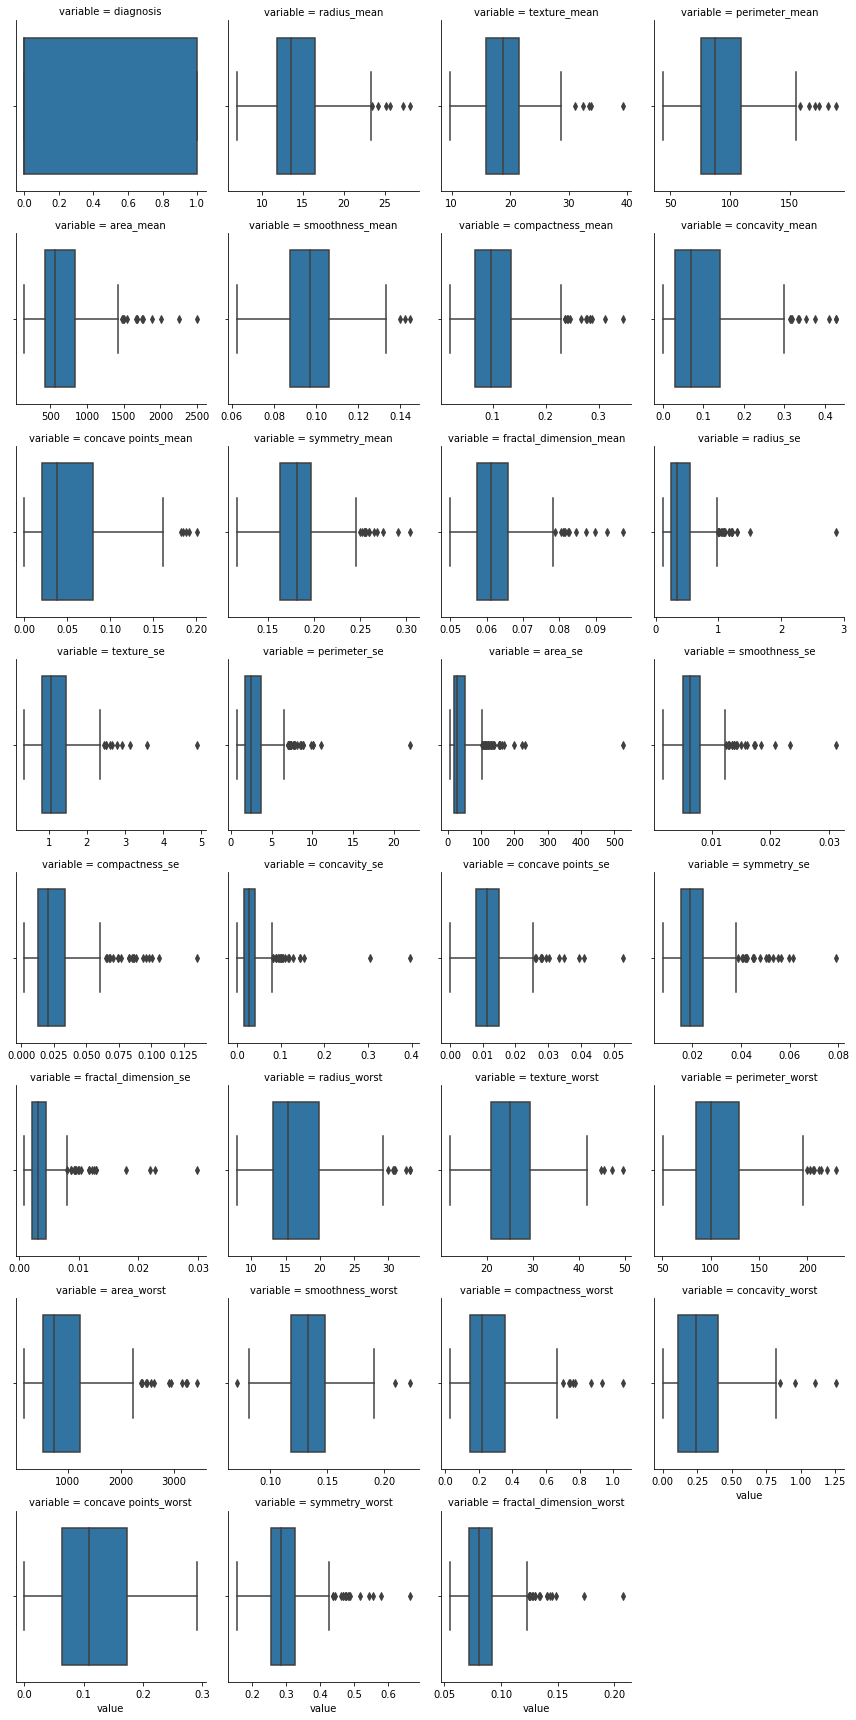

In [14]:
num= [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.boxplot, 'value')
n1

### Bivariate Analysis

#### Variables impact on Target Varible

C:\Users\Vishnu Soni\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


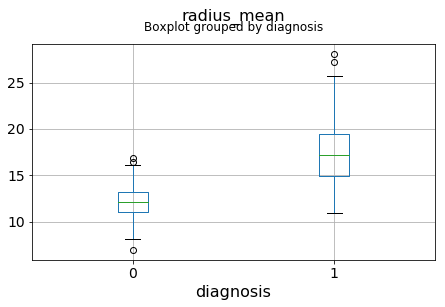

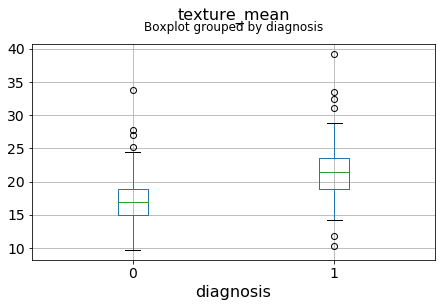

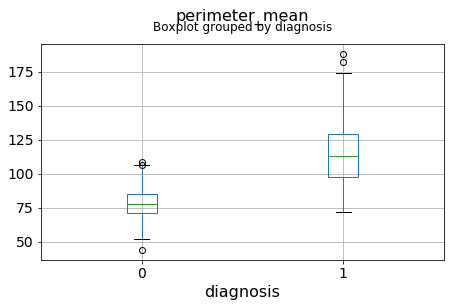

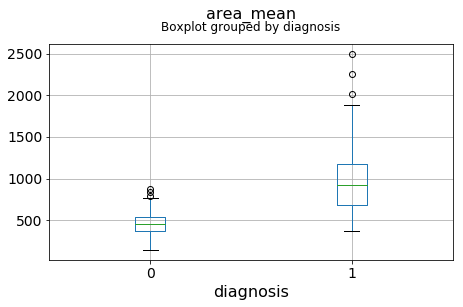

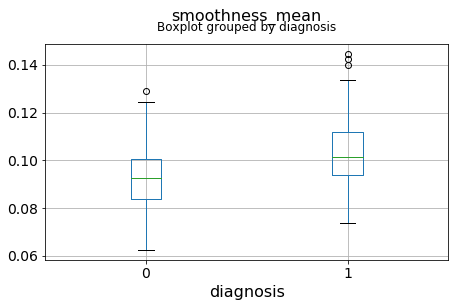

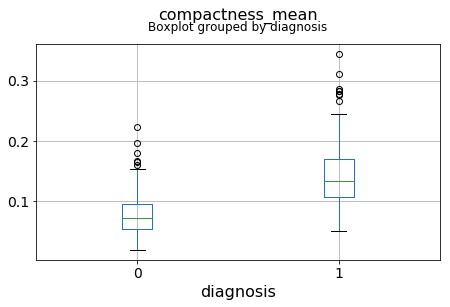

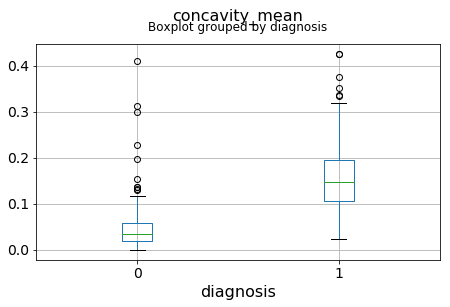

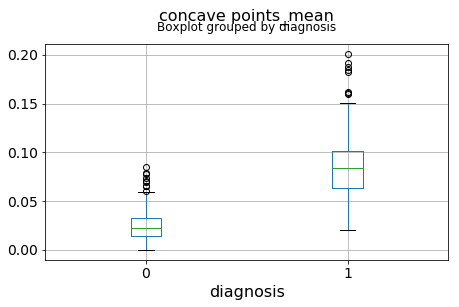

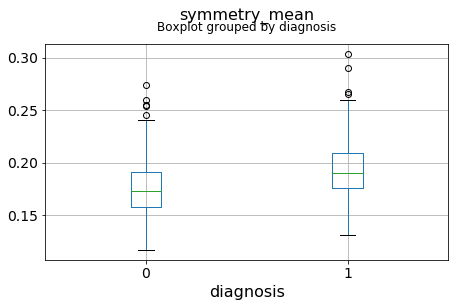

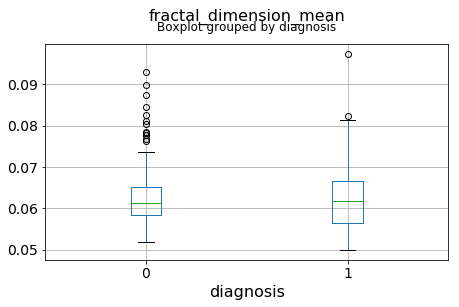

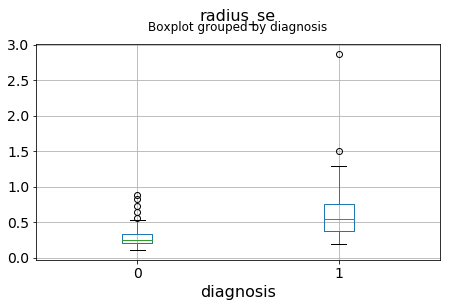

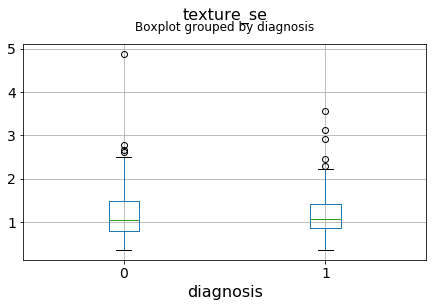

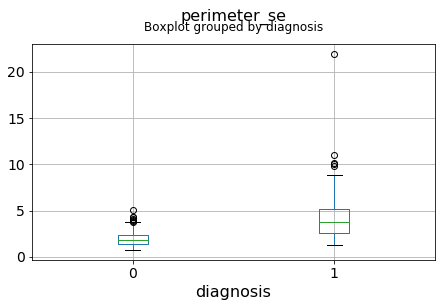

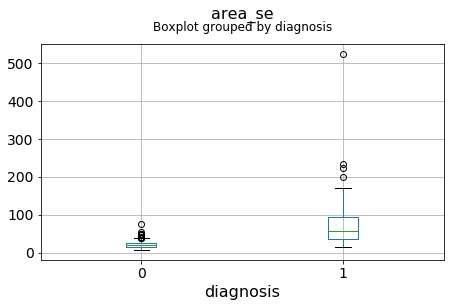

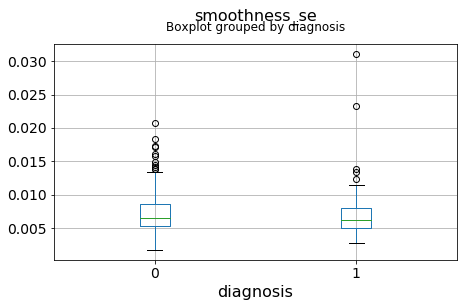

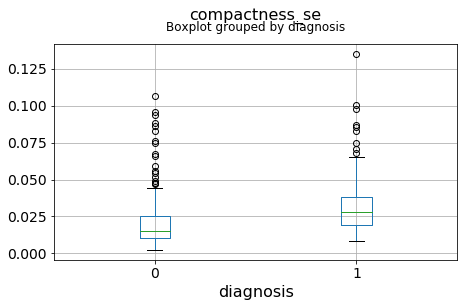

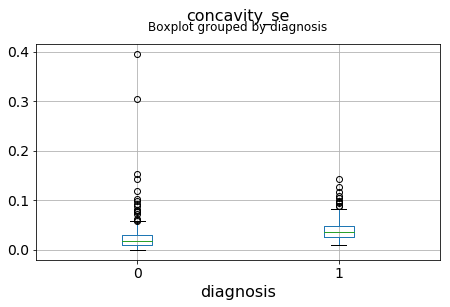

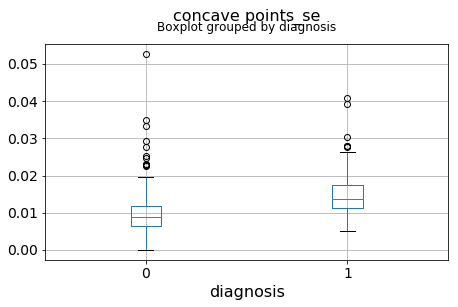

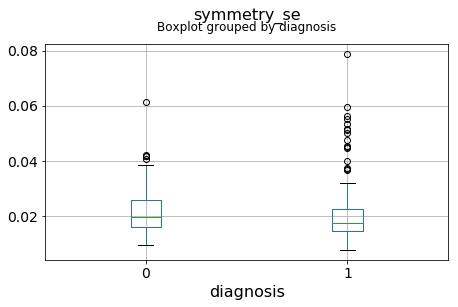

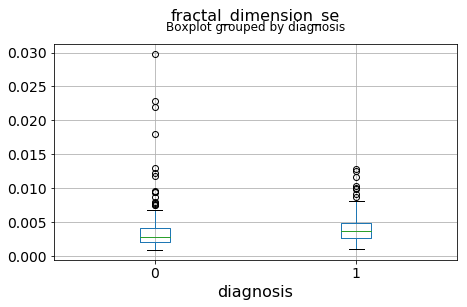

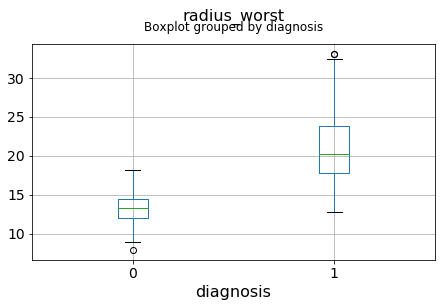

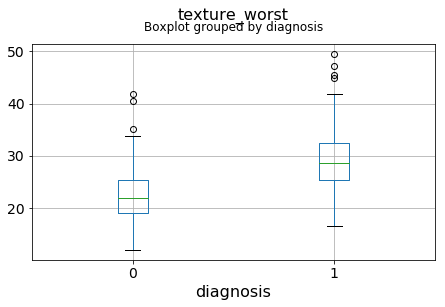

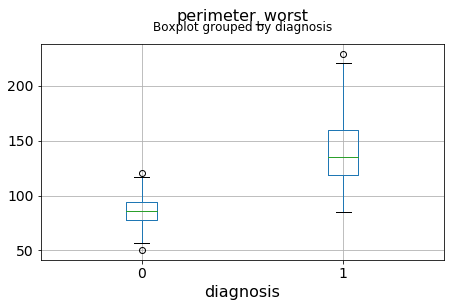

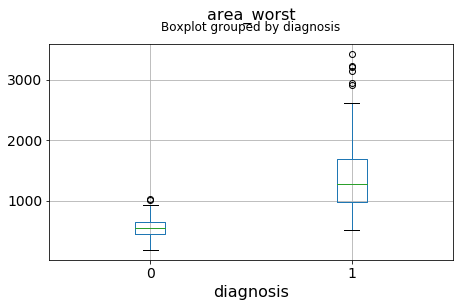

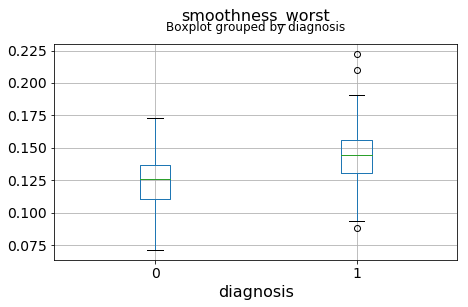

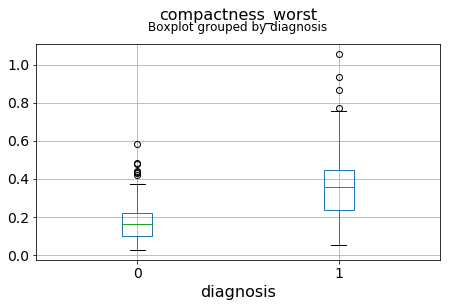

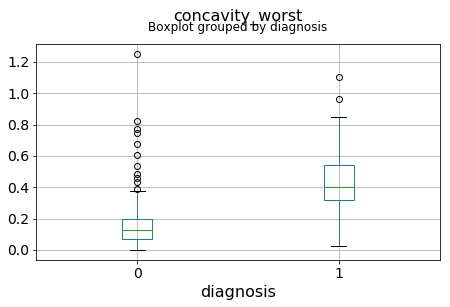

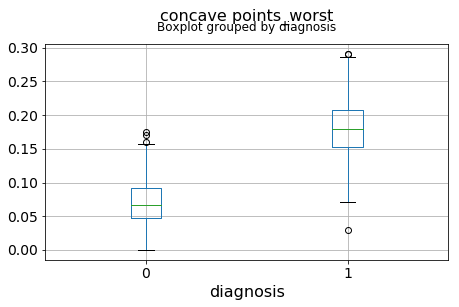

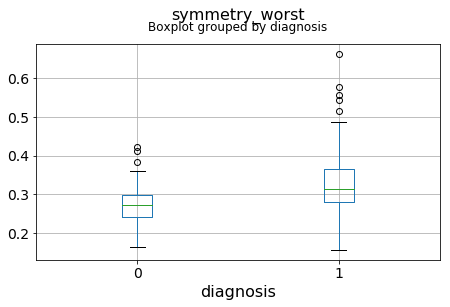

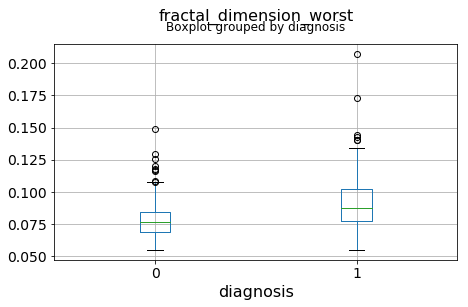

In [15]:
for c in df.columns[1:]:
    df.boxplot(c,by='diagnosis',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("diagnosis", fontsize=16)

####  fractal_dimension_mean, texture_se, smoothness_se, fractal_dimension_se features have less impact on Target Variable

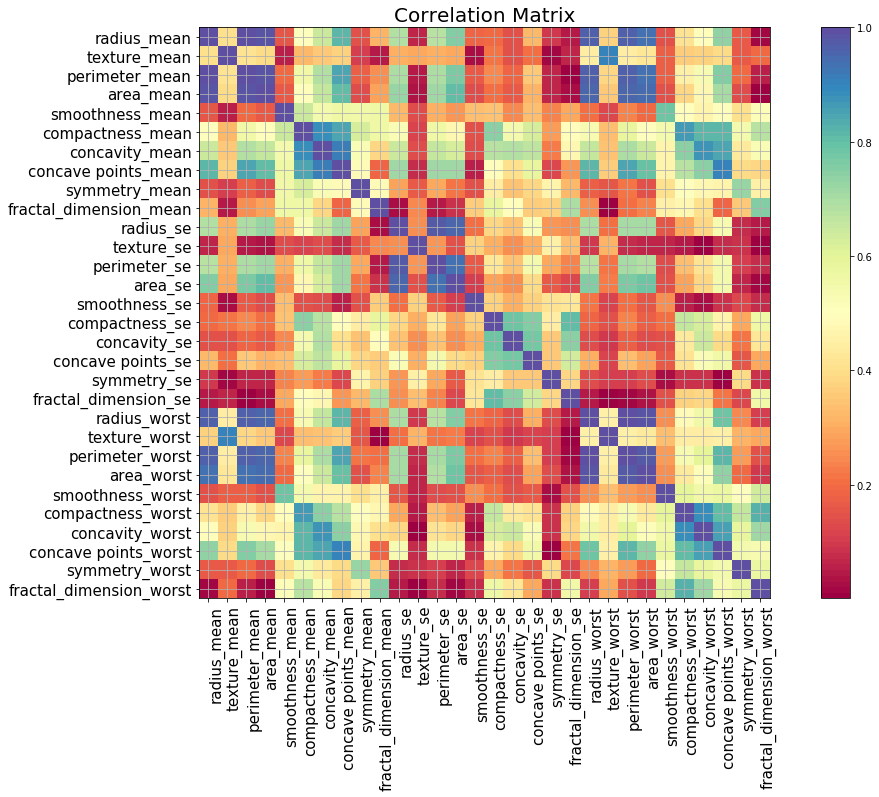

In [16]:
# Bivariate Analysis
# Make a Features Correlation Matrix 

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('Spectral', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop('diagnosis' ,axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [17]:
# Dropping of features with a correlation greater than 0.9
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [18]:
to_drop

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

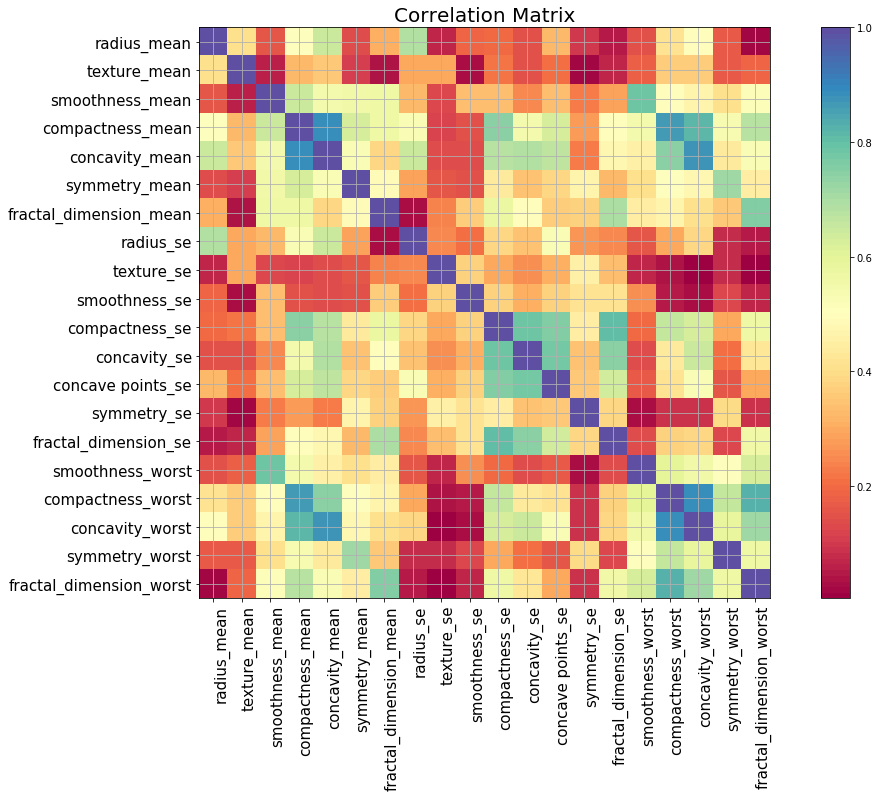

In [19]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [20]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.408067,0.158694,0.502731,0.646675,0.143684,0.313147,0.685526,0.066307,0.191074,0.197970,0.147847,0.324018,0.096586,0.046163,0.145162,0.413032,0.492888,0.167522,0.017559
texture_mean,0.408067,1.000000,0.061097,0.326398,0.357496,0.109588,0.043454,0.302308,0.297736,0.028895,0.217875,0.150334,0.211206,0.020005,0.065022,0.175929,0.368690,0.372244,0.170853,0.193043
smoothness_mean,0.158694,0.061097,1.000000,0.650172,0.549340,0.554564,0.569029,0.329172,0.132226,0.337759,0.341546,0.250379,0.336533,0.233070,0.292544,0.785501,0.496848,0.464005,0.406868,0.520145
compactness_mean,0.502731,0.326398,0.650172,1.000000,0.889756,0.623672,0.563414,0.525039,0.117528,0.144661,0.741236,0.547321,0.625053,0.276398,0.500749,0.547539,0.867662,0.815556,0.542095,0.676677
concavity_mean,0.646675,0.357496,0.549340,0.889756,1.000000,0.529483,0.390553,0.648847,0.141444,0.137801,0.676813,0.684090,0.670112,0.223914,0.475631,0.462198,0.746577,0.875994,0.438633,0.528492
symmetry_mean,0.143684,0.109588,0.554564,0.623672,0.529483,1.000000,0.485796,0.290532,0.162856,0.149568,0.442172,0.349105,0.387451,0.468050,0.323636,0.404974,0.502500,0.475416,0.721230,0.452437
fractal_dimension_mean,0.313147,0.043454,0.569029,0.563414,0.390553,0.485796,1.000000,0.025837,0.242133,0.362945,0.581570,0.499387,0.365891,0.378975,0.698147,0.451893,0.471404,0.403011,0.357433,0.755101
radius_se,0.685526,0.302308,0.329172,0.525039,0.648847,0.290532,0.025837,1.000000,0.252063,0.204424,0.384923,0.345414,0.527234,0.265974,0.251345,0.155382,0.293407,0.386742,0.076703,0.050116
texture_se,0.066307,0.297736,0.132226,0.117528,0.141444,0.162856,0.242133,0.252063,1.000000,0.379361,0.303191,0.257917,0.306794,0.456445,0.337369,0.066144,0.043952,0.004583,0.083073,0.010806
smoothness_se,0.191074,0.028895,0.337759,0.144661,0.137801,0.149568,0.362945,0.204424,0.379361,1.000000,0.379066,0.307074,0.377501,0.414558,0.421576,0.254801,0.051793,0.030211,0.125220,0.072207


#### Dealing with Missing Values for Train dataset

In [21]:
df.isnull().sum()

diagnosis                   0
radius_mean                 0
texture_mean               12
perimeter_mean              0
area_mean                   0
smoothness_mean             1
compactness_mean            6
concavity_mean              0
concave points_mean         0
symmetry_mean               1
fractal_dimension_mean      2
radius_se                  14
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               3
compactness_se              2
concavity_se                1
concave points_se           1
symmetry_se                 1
fractal_dimension_se       13
radius_worst                0
texture_worst               0
perimeter_worst             1
area_worst                 13
smoothness_worst            3
compactness_worst           0
concavity_worst             6
concave points_worst        5
symmetry_worst              5
fractal_dimension_worst     3
dtype: int64

In [22]:
df['texture_mean'].fillna(df['texture_mean'].median(), inplace= True)
df['radius_se'].fillna(df['radius_se'].median() , inplace= True)
df['fractal_dimension_se'].fillna(df['fractal_dimension_se'].median(), inplace= True)
df['area_worst'].fillna(df['area_worst'].median(), inplace= True)

In [23]:
df.dropna(inplace= True)

In [24]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Baseline Columns

In [25]:
baseline_cols = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [26]:
df_baseline = df[baseline_cols]

In [79]:
Test= test[baseline_cols]

In [27]:
y_all = df.diagnosis
df = df.drop(['diagnosis'],axis = 1)

#### Train Test Split to create a validation set

In [28]:
# Splitting the data into Train and Validation set
xtrain, xtest, ytrain, ytest = train_test_split(df_baseline,y_all,test_size=1/3, random_state=11, stratify = y_all)

In [29]:
std = StandardScaler()
xtrain =std.fit_transform(xtrain)
xtest= std.transform(xtest)

#### LogisticRegression classifier

In [30]:
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Confusion Matrix
pred_val = model.predict(xtest)

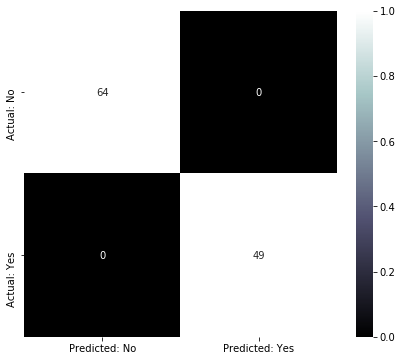

In [32]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [33]:
print(classification_report(ytest,pred_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        49

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



#### Cross validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
kfold=KFold(n_splits=10, random_state=7)

In [36]:
result= cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9913636363636364


### Reverse Feature Elimination or Backward Selection

In [37]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each feature
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(df_baseline, y_all)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [38]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = df_baseline.columns
ranking_df['Rank'] = rfe.ranking_

In [39]:
ranked = ranking_df.sort_values(by=['Rank'])

In [40]:
ranked

,Feature_name,Rank
13,concavity_worst,1
6,radius_se,2
12,compactness_worst,3
14,symmetry_worst,4
0,radius_mean,5
4,concavity_mean,6
11,smoothness_worst,7
3,compactness_mean,8
15,fractal_dimension_worst,9
5,symmetry_mean,10


### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(random_state=1)
clf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [44]:
# Confusion Matrix
pred_val = clf.predict(xtest)

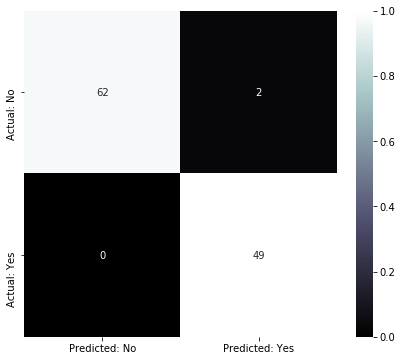

In [45]:
cm = confusion_matrix(ytest,pred_val)
plot_confusion_matrix(cm, ['No', 'Yes'])

In [46]:
print(classification_report(ytest,pred_val))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       0.96      1.00      0.98        49

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



#### Cross validation

In [47]:
kfold=KFold(n_splits=5, random_state=7)

In [48]:
result= cross_val_score(clf, xtrain, ytrain, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9719294250506527


### XGBoost Classification

In [49]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [50]:
pred_val = xgboost.predict(xtest)

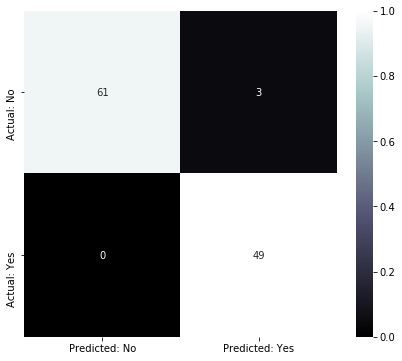

In [51]:
cm = confusion_matrix(ytest,pred_val)
plot_confusion_matrix(cm, ['No', 'Yes'])

In [52]:
print(classification_report(ytest,pred_val))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        64
           1       0.94      1.00      0.97        49

    accuracy                           0.97       113
   macro avg       0.97      0.98      0.97       113
weighted avg       0.97      0.97      0.97       113



#### Cross validation

In [53]:
kfold=KFold(n_splits=5, random_state=7)

In [54]:
result= cross_val_score(xgboost, xtrain, ytrain, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9765140199953499


### Support Vector Classifier

In [55]:
from sklearn.svm import SVC

In [56]:
svc_model= SVC()

In [57]:
svc_model.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
y_predict= svc_model.predict(xtest)

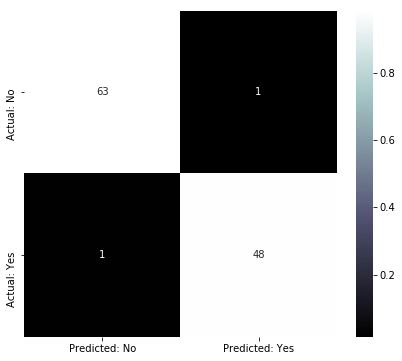

In [59]:
cm = confusion_matrix(ytest,y_predict)
plot_confusion_matrix(cm, ['No', 'Yes'])

In [60]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        49

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



#### Cross validation

In [61]:
kfold=KFold(n_splits=5, random_state=7)

In [62]:
result= cross_val_score(svc_model, xtrain, ytrain, cv=kfold, scoring='roc_auc')
print(result.mean())

0.9855418075530608


#### Algorithm Tuning - Tuning SVM

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
svc_model = SVC()
kfold = KFold(n_splits=5, random_state=21)
grid = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='roc_auc', cv=kfold)
grid_result = grid.fit(xtrain, ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.990265 using {'C': 0.1, 'kernel': 'linear'}
0.990265 (0.007258) with: {'C': 0.1, 'kernel': 'linear'}
0.958402 (0.025720) with: {'C': 0.1, 'kernel': 'poly'}
0.965036 (0.021788) with: {'C': 0.1, 'kernel': 'rbf'}
0.963497 (0.018914) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.987779 (0.006955) with: {'C': 0.3, 'kernel': 'linear'}
0.971829 (0.024765) with: {'C': 0.3, 'kernel': 'poly'}
0.976322 (0.017638) with: {'C': 0.3, 'kernel': 'rbf'}
0.971547 (0.014126) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.985803 (0.010094) with: {'C': 0.5, 'kernel': 'linear'}
0.972324 (0.026386) with: {'C': 0.5, 'kernel': 'poly'}
0.981164 (0.014783) with: {'C': 0.5, 'kernel': 'rbf'}
0.967970 (0.015812) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.982616 (0.010998) with: {'C': 0.7, 'kernel': 'linear'}
0.972310 (0.023058) with: {'C': 0.7, 'kernel': 'poly'}
0.983170 (0.014850) with: {'C': 0.7, 'kernel': 'rbf'}
0.969676 (0.019663) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.984652 (0.010705) with: {'C': 0.9, 'kernel': 'line

We can see the most accurate configuration was SVM with an Linear kernel and C=0.1, with the roc_auc of 0.990265

In [67]:
SVC_model = SVC(C=0.1, kernel='linear')

In [68]:
SVC_model.fit(xtrain, ytrain)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
predictions = SVC_model.predict(xtest)

### For Test dataset

In [81]:
Test= std.transform(Test)

In [82]:
diag = SVC_model.predict(Test)

In [84]:
test_pred = pd.DataFrame(diag, columns= ['diagnosis'])

0    148
1     44
Name: diagnosis, dtype: int64